In [37]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [38]:
data = pd.read_csv('Data/creditcard.csv')

In [39]:
data.shape

(284807, 31)

In [40]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

In [41]:
from sklearn.preprocessing import StandardScaler
data['NormalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [42]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [43]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [45]:
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


Plot confusion matrix function

In [57]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [48]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [49]:
y_pred = decision_tree.predict(X_test)

In [50]:
decision_tree.score(X_test,y_test)

0.9992977774656788

Confusion matrix, without normalization
[[85273    23]
 [   37   110]]


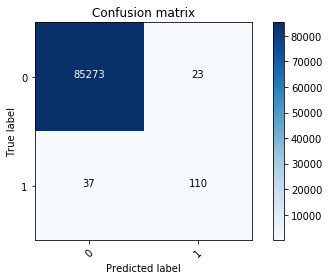

In [54]:
cnf_matrix = confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [55]:
y_pred = decision_tree.predict(X)

In [56]:
y_expected = pd.DataFrame(y)

Confusion matrix, without normalization
[[284292     23]
 [    37    455]]


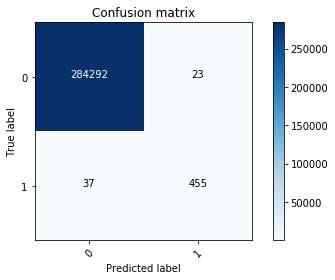

In [59]:
cnf_matrix = confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
random_forest = RandomForestClassifier(n_estimators=100)

In [62]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [63]:
y_pred = random_forest.predict(X_test)

In [64]:
random_forest.score(X_test,y_test)

0.9995435553526912

In [65]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[85290     6]
 [   33   114]]


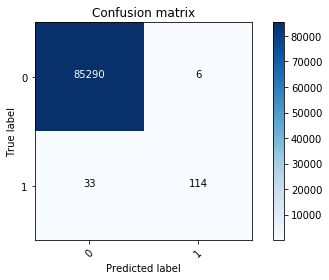

In [66]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [67]:
y_pred = random_forest.predict(X)

In [68]:
cnf_matrix = confusion_matrix(y,y_pred)

Confusion matrix, without normalization
[[284309      6]
 [    33    459]]


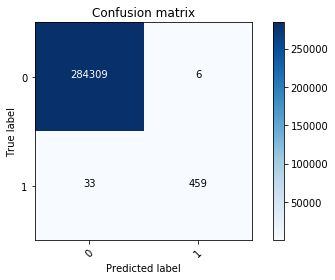

In [69]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

# Deep Learning

In [70]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [72]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [74]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=20)

Epoch 1/20
13291/13291 [==============================] - 9s 674us/step - loss: 0.0096 - accuracy: 0.9988
Epoch 2/20
13291/13291 [==============================] - 8s 618us/step - loss: 0.0042 - accuracy: 0.9992
Epoch 3/20
13291/13291 [==============================] - 9s 712us/step - loss: 0.0038 - accuracy: 0.9993
Epoch 4/20
13291/13291 [==============================] - 9s 714us/step - loss: 0.0036 - accuracy: 0.9993
Epoch 5/20
13291/13291 [==============================] - 9s 703us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 6/20
13291/13291 [==============================] - 9s 645us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 7/20
13291/13291 [==============================] - 9s 646us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 8/20
13291/13291 [==============================] - 9s 654us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 9/20
13291/13291 [==============================] - 9s 646us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 10/20
13291/13291 [=====================

In [75]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 1s 379us/step - loss: 0.0057 - accuracy: 0.9994
[0.005699183326214552, 0.9994499087333679]


In [76]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [77]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [78]:
conf_matrix = confusion_matrix(y_test, y_pred.round())

Confusion matrix, without normalization
[[85285    11]
 [   36   111]]


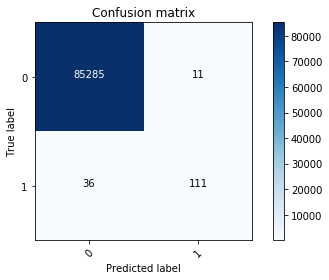

In [79]:
plot_confusion_matrix(conf_matrix, classes = [0,1])